<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/Wine_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path_to_file ='https://raw.githubusercontent.com/iqbalamo93/Datasets/master/wine.csv'

In [5]:
df=pd.read_csv(path_to_file)

In [6]:
cols_at_end = ['class_label', 'class_name']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

In [7]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline,class_label,class_name
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,Barolo
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,Barolo
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,Barolo
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,Barolo
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,Barolo


In [8]:
dc=df.iloc[:,:-2]

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [10]:
scaler = StandardScaler()

In [11]:
dc = scaler.fit_transform(dc)

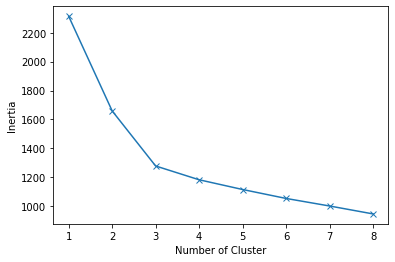

In [12]:
inertia  = []
for x in range(1,9):
  model =  KMeans(n_clusters=x, random_state=1)
  model.fit(dc)
  inertia.append(model.inertia_)
plt.plot(range(1,9),inertia,marker='x')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [13]:
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(dc)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=3, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [15]:
labels = pipeline.predict(dc)
labels = pd.Series(labels,name='labels')
pd.crosstab(labels, df['class_name'])

class_name,Barbera,Barolo,Grignolino
labels,,,
0,0,59,2
1,0,0,66
2,48,0,3
